# IMDB data frames 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.precision',3)

In [2]:
cd data

/Users/mindy/Documents/flatiron_school/dc_ds_06_03_mod1_project/data


In [3]:
ls

budget_profit_merged.pkl   imdb.title.ratings.csv
imdb.name.basics.csv       imdbcombined.pkl
imdb.title.akas.csv        movie_profit_info.pkl
imdb.title.basics.csv      rt.movie_info.tsv
imdb.title.crew.csv        rt.reviews.tsv
imdb.title.principals.csv  tmdb.movies.csv


In [4]:
name = pd.read_csv('imdb.name.basics.csv')

In [ ]:
# name.info()

In [5]:
# both birth and death have a lot of null value however we care about if the movie featured a hollywood star 
# we will remove both birth and death year
name.drop(columns=['birth_year','death_year'], inplace = True)

In [6]:
# if known_for_titles are nan most likely not a star 
name.dropna(inplace = True)

In [7]:
name.head()

,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [8]:
# map director to name_id 
# turn name into dictionary # use this for title_crew_csv 
name_dict = {}
for _, row in name.iterrows():
    name_dict[row['nconst']] = row['primary_name']

In [9]:
# filter for director and actor and actress, writers  in primary_profession (that will be our focus )
name = name[name.primary_profession.str.contains('actor|director|actress|writer', regex = True, na = False)]

In [10]:
# drop primary profession to reduce data size 
name.drop(columns='primary_profession', inplace = True)

In [11]:
name['num_movie_known'] = name.known_for_titles.str.split(',').apply(lambda x: len(x))

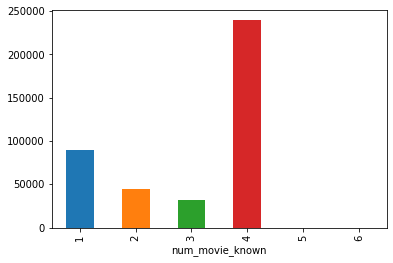

In [12]:
name.groupby('num_movie_known').size().plot.bar()  # set 4 or more known movie as stars 

In [12]:
# we will check to see if known_for_titles a good way to see star check a few popular hollywood star
stars = ['Tom Cruise', 'Brad Pitt', 'Jennifer lawrence', 'Meryl Streep', \
         'Leonardo DiCaprio',  'Steven Spielberg','Clint Eastwood']
name[name.primary_name.isin(stars)]  # confirm that 4 star is a good place to cut for stars 

,nconst,primary_name,known_for_titles,num_movie_known
18533,nm0000658,Meryl Streep,"tt1135503,tt0918927,tt0458352,tt0089755",4
24026,nm0000093,Brad Pitt,"tt1210166,tt0114746,tt0356910,tt0816711",4
24027,nm0000142,Clint Eastwood,"tt0405159,tt0105695,tt1205489,tt0112579",4
39130,nm0000129,Tom Cruise,"tt0325710,tt0116695,tt0092099,tt0181689",4
76403,nm0000138,Leonardo DiCaprio,"tt0407887,tt0120338,tt0993846,tt1375666",4
85758,nm0000229,Steven Spielberg,"tt0108052,tt0082971,tt0083866,tt0120815",4


In [13]:
# keep only num_movie_known is 4 or higher 
name = name[name.num_movie_known >=4]

In [14]:
# remove known for title and num_movie known as we only need nconst and primary name
name.drop(columns=['known_for_titles','num_movie_known'], inplace = True)

In [15]:
name.head()

,nconst,primary_name
2,nm0062070,Bruce Baum
5,nm0062879,Ruel S. Bayani
9,nm0063750,Lindsay Beamish
10,nm0064023,Bryan Beasley
12,nm0065847,Michael Frost Beckner


In [16]:
# title with actors 
title_crew = pd.read_csv('imdb.title.principals.csv')

In [17]:
# title_crew.info()

In [18]:
# remove characters, job, ordering is for repeating movie id with crew info 
title_crew.drop(columns=['characters','job','ordering'], inplace = True)

In [19]:
title_crew.category.value_counts()  # only going to look at actor, director, and actress,writers

actor                  256718
director               146393
actress                146208
producer               113724
cinematographer         80091
composer                77063
writer                  74357
self                    65424
editor                  55512
production_designer      9373
archive_footage          3307
archive_sound              16
Name: category, dtype: int64

In [20]:
# only interested in actor, actress, and producer 
title_crew = title_crew[title_crew.category.isin(['actor','director','actress','writer'])]

In [21]:
title_crew.category.unique()  # double check 

array(['actor', 'director', 'actress', 'writer'], dtype=object)

In [22]:
title_crew.shape, name.shape

((623676, 3), (239046, 2))

In [23]:
# merge the title_crew with name crew with nconst 
merged_df=pd.merge(title_crew, name, on = 'nconst', how = 'inner')

In [24]:
merged_df.shape

(413741, 4)

In [ ]:
# merged_df.info()

In [23]:
merged_df.head()

,tconst,nconst,category,primary_name
0,tt0111414,nm0246005,actor,Tommy Dysart
1,tt0111414,nm0398271,director,Frank Howson
2,tt5573596,nm0398271,director,Frank Howson
3,tt0323808,nm2694680,actor,Henry Garrett
4,tt0323808,nm0574615,actor,Graham McTavish


In [25]:
# remove nconst as no longer useful
merged_df.drop('nconst',axis =1, inplace = True)

In [26]:
merged_df.primary_name.nunique()  # 192142 writer/actor/actress/directors 

192142

In [27]:
# we will also make two extra column as 0 as false 1 as True
merged_df['no_known_director'] = merged_df.category.apply(lambda x: 1 if x == 'director' else 0)

In [28]:
merged_df['no_known_actor_actress']= merged_df.category.apply(lambda x: 1 if x in ['actor','actress'] else 0)

In [29]:
merged_df['no_known_writer'] = merged_df.category.apply(lambda x: 1 if x == 'writer' else 0)

In [30]:
merged_df.head()

,tconst,category,primary_name,no_known_director,no_known_actor_actress,no_known_writer
0,tt0111414,actor,Tommy Dysart,0,1,0
1,tt0111414,director,Frank Howson,1,0,0
2,tt5573596,director,Frank Howson,1,0,0
3,tt0323808,actor,Henry Garrett,0,1,0
4,tt0323808,actor,Graham McTavish,0,1,0


In [31]:
merged_df = merged_df.groupby('tconst').sum()

In [32]:
merged_df.head()

,no_known_director,no_known_actor_actress,no_known_writer
tconst,,,
tt0063540,1,4,4
tt0066787,1,4,0
tt0069049,1,4,0
tt0069204,1,5,1
tt0100275,2,4,1


In [33]:
merged_df.shape

(118071, 3)

In [34]:
#title then merge 
title_akas = pd.read_csv('imdb.title.akas.csv')
# title_akas.head()  # number of times the movie is aired in other coun

In [ ]:
# title_akas.info()

In [35]:
title_akas[title_akas.is_original_title == 1].language.nunique()  # only 2 not a lot of info 

2

In [36]:
# remove unncessary column 
title_akas.drop(columns=['ordering','title','language','types','attributes'], inplace = True)

In [37]:
title_akas[title_akas.is_original_title == 1].region.nunique()  # only 3 region, so not useful 

3

In [38]:
# number of region showed and orginal language column
num_region = title_akas.groupby('title_id').region.nunique()

In [39]:
region_title = num_region.reset_index()

In [40]:
region_title.rename(columns={'title_id':'tconst','region':'num_region'}, inplace = True)

In [43]:
# region_title
region_title.shape, merged_df.shape

((122302, 2), (118071, 3))

In [44]:
region_title  # will merge that with the currently merged data frame 

merged_df = merged_df.join(region_title.set_index('tconst'), how = 'inner')

In [45]:
merged_df.shape

(101958, 4)

In [46]:
title_basics = pd.read_csv('imdb.title.basics.csv')

In [ ]:
# title_basics.head()

In [ ]:
# title_basics.info()

In [47]:
# remove null values 
title_basics.dropna(inplace = True)

In [48]:
# split genres into each individual row for each movie 

genres = pd.concat([pd.Series(row['tconst'],row['genres'].split(','))
                   for _, row in title_basics.iterrows()]).reset_index()

In [49]:
# rename column
genres.rename(columns = {'index': 'genre', 0:'tconst'}, inplace = True)
genres.head()

,genre,tconst
0,Action,tt0063540
1,Crime,tt0063540
2,Drama,tt0063540
3,Biography,tt0066787
4,Drama,tt0066787


In [50]:
# put genres back with start_year and runtime_mins
title_basics = genres.merge(title_basics, on = 'tconst', how = 'inner')

In [51]:
title_basics.drop(columns = 'genres', inplace = True)
title_basics.head()

,genre,tconst,primary_title,original_title,start_year,runtime_minutes
0,Action,tt0063540,Sunghursh,Sunghursh,2013,175.0
1,Crime,tt0063540,Sunghursh,Sunghursh,2013,175.0
2,Drama,tt0063540,Sunghursh,Sunghursh,2013,175.0
3,Biography,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0
4,Drama,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0


In [52]:
merged_df.shape, title_basics.shape

((101958, 4), (193731, 6))

In [53]:
merged_df = merged_df.merge(title_basics.set_index('tconst'), how = 'inner', left_index=True, right_index=True)

In [54]:
merged_df.shape

(146715, 9)

In [77]:
# not going to use title.crew not useful for this 
writer_director = pd.read_csv('imdb.title.crew.csv')
writer_director.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 3 columns):
tconst       146144 non-null object
directors    140417 non-null object
writers      110261 non-null object
dtypes: object(3)
memory usage: 3.3+ MB


In [78]:
# drop_na
writer_director.dropna(inplace = True)

In [79]:
directors = pd.concat([pd.Series(row['tconst'],row['directors'].split(','))
           for _, row in writer_director.iterrows()]).reset_index()

In [85]:
directors.set_index(0, inplace = True)

(126518, 1)

In [90]:
writers = pd.concat([pd.Series(row['tconst'],row['writers'].split(','))
           for _, row in writer_director.iterrows()]).reset_index()

In [93]:
writers.set_index(0, inplace = True)

In [94]:
writers.shape, writers.head()

((176636, 1),                index
 0                   
 tt0285252  nm0899854
 tt0462036  nm1940585
 tt0835418  nm0310087
 tt0835418  nm0841532
 tt0878654  nm0284943)

In [95]:
writer_director2 = writers.join(directors, how = 'inner', lsuffix= '_l')
writer_director2.shape

(254157, 2)

In [96]:
writer_director2.rename(columns={'index_l':'writers', 'index':'directors'}, inplace = True)

In [98]:
writer_director2.head()

,writers,directors
0,,
tt0063540,nm0023551,nm0712540
tt0063540,nm1194313,nm0712540
tt0063540,nm0347899,nm0712540
tt0063540,nm1391276,nm0712540
tt0069049,nm0000080,nm0000080


In [105]:
# for writer_director mapping 
writer_director_movie_df = writer_director2.applymap(lambda x: name_dict.get(x, np.nan))
writer_director_movie_df.head()

,writers,directors
0,,
tt0063540,Abrar Alvi,Harnam Singh Rawail
tt0063540,Mahasweta Devi,Harnam Singh Rawail
tt0063540,Gulzar,Harnam Singh Rawail
tt0063540,Anjana Rawail,Harnam Singh Rawail
tt0069049,Orson Welles,Orson Welles


In [106]:
merged_df = writer_director_movie_df.join(merged_df, how = 'inner')

In [107]:
merged_df.shape

(341849, 11)

In [108]:
# imdb title rating 
rating = pd.read_csv('imdb.title.ratings.csv')

In [110]:
rating.shape

(73856, 3)

In [111]:
merged_df = merged_df.join(rating.set_index('tconst'), how = 'inner')

In [112]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 282849 entries, tt0063540 to tt9911774
Data columns (total 13 columns):
writers                   281729 non-null object
directors                 282386 non-null object
no_known_director         282849 non-null int64
no_known_actor_actress    282849 non-null int64
no_known_writer           282849 non-null int64
num_region                282849 non-null int64
genre                     282849 non-null object
primary_title             282849 non-null object
original_title            282849 non-null object
start_year                282849 non-null int64
runtime_minutes           282849 non-null float64
averagerating             282849 non-null float64
numvotes                  282849 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 30.2+ MB


In [113]:
merged_df.set_index('primary_title', inplace= True)

In [114]:
merged_df.columns

Index(['writers', 'directors', 'no_known_director', 'no_known_actor_actress',
       'no_known_writer', 'num_region', 'genre', 'original_title',
       'start_year', 'runtime_minutes', 'averagerating', 'numvotes'],
      dtype='object')

In [116]:
merged_df.shape

(282849, 12)

In [117]:
merged_df.to_pickle('imdbcombined.pkl')  # save to pickle file 